In [1]:
import pandas as pd
import numpy as np
import os
import csv
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# dataset1
## transfer date only need month and year.

In [2]:
def tran_date(df):
    df['Date'] = pd.to_datetime(df["DATE (YYYY-MM-DDTHH:MI:SSZ)"], format='%Y-%m-%dT%H:%M:%SZ')
    df['Year_Month'] = df['Date'].dt.strftime('%Y-%m')
    #print(df)

## find the amount instance with same period of time

In [3]:
def find_value(df, column_name, target_value):
    target_index = df.index[df[column_name] == target_value]
    
    if len(target_index) == 0:
        return 0
    rows_after_target = len(df) - target_index[0] - 1
    return rows_after_target


## drop columns

In [4]:
input_path = './dataset1/'
file_paths = [os.path.join(input_path, f) for f in os.listdir(input_path) if f.endswith('.csv')]

for filename in os.listdir(input_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_path, filename)
        df = pd.read_csv(file_path)
        print(filename)
        tran_date(df)
        amount=find_value(df, 'Year_Month', '2019-03')
        print(amount)
        length=len(df)
        print(length-amount)
        df=df[length-amount:]
        df=df[['DATE (YYYY-MM-DDTHH:MI:SSZ)', 'DATE_QC',
       'LATITUDE (degree_north)', 'LONGITUDE (degree_east)', 'POSITION_QC',
       'PRES (decibar)', 'PRES_QC', 'PSAL (psu)', 'PSAL_QC',
       'TEMP (degree_Celsius)', 'TEMP_QC']]
        print(df.isna().sum())
        df= df.dropna()
        print(df.isna().sum())
        df.to_csv(file_path, index=False)

PR_PF_4902338.csv
205381
139175
DATE (YYYY-MM-DDTHH:MI:SSZ)    0
DATE_QC                        0
LATITUDE (degree_north)        0
LONGITUDE (degree_east)        0
POSITION_QC                    0
PRES (decibar)                 0
PRES_QC                        0
PSAL (psu)                     0
PSAL_QC                        0
TEMP (degree_Celsius)          0
TEMP_QC                        0
dtype: int64
DATE (YYYY-MM-DDTHH:MI:SSZ)    0
DATE_QC                        0
LATITUDE (degree_north)        0
LONGITUDE (degree_east)        0
POSITION_QC                    0
PRES (decibar)                 0
PRES_QC                        0
PSAL (psu)                     0
PSAL_QC                        0
TEMP (degree_Celsius)          0
TEMP_QC                        0
dtype: int64
PR_PF_3901684.csv
149847
8917
DATE (YYYY-MM-DDTHH:MI:SSZ)    0
DATE_QC                        0
LATITUDE (degree_north)        0
LONGITUDE (degree_east)        0
POSITION_QC                    0
PRES (decibar)       

## generate label

In [5]:
def flag_qc(df):
    qc_values = []  # 存储QC列的值
    for i, row in df.iterrows():
        values = row[['DATE_QC', 'POSITION_QC','PRES_QC', 'PSAL_QC','TEMP_QC']]
        if all(v in [0, 1] for v in values):
            qc_values.append(0)
        else:
            qc = pd.NA
            if values['DATE_QC'] not in [0, 1]:
                qc = 1
            if values['POSITION_QC'] not in [0, 1]:
                qc = 2
            if values['PRES_QC'] not in [0, 1]:
                qc = 3
            if values['PSAL_QC'] not in [0, 1]:
                qc = 4
            if values['TEMP_QC'] not in [0, 1]:
                qc = 5
            qc_values.append(qc)
    df['QC'] = qc_values
    return df

In [6]:
def flag_label(df):
    label_values = []  # 存储QC列的值
    for i, row in df.iterrows():
        values = row[['DATE_QC', 'POSITION_QC','PRES_QC', 'PSAL_QC','TEMP_QC']]
        if all(v in [0, 1] for v in values):
            label_values.append(0)
        else:
            label_values.append(1)
    df['Label'] = qc_values
    return df

# EDA

In [7]:
def allqc(df):
    non_binary_rows = df.loc[~df[['DATE_QC', 'POSITION_QC','PRES_QC', 'PSAL_QC','TEMP_QC',]].isin([0, 1]).all(axis=1)]
    percentage = len(non_binary_rows) / len(df)
    print(f"low quality data precentage: {percentage:.10%}")

In [8]:
def oneqc(df):
    non_binary_rows = df.loc[df[['QC']].isin([0]).all(axis=1)]
    percentage = len(non_binary_rows) / len(df)
    print(f"high quality data precentage: {percentage:.10%}")

In [9]:
def plot_qc_distribution(df):
    qc_counts = df['QC'].value_counts()
    qc_counts.plot(kind='bar')
    plt.xlabel('QC Values')
    plt.ylabel('Count')
    plt.title('QC Value Distribution')
    plt.show()


In [10]:
def find_non_binary_values(df, columns):
    result = []
    for column in columns:
        non_binary_values = df[(df[column] != 0) & (df[column] != 1)& (~df[column].isna())][column]
        if not non_binary_values.empty:
            for index, value in non_binary_values.items():
                result.append((column, value, index))
    return result

PR_PF_4902338.csv 205381
low quality data precentage: 0.0038951997%
high quality data precentage: 99.9961048003%


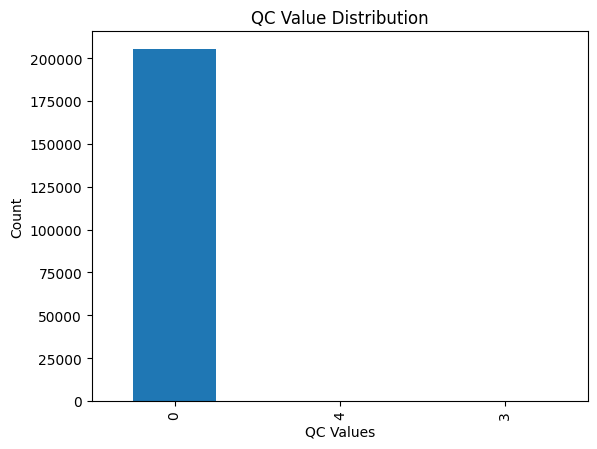

PR_PF_3901684.csv 149847
low quality data precentage: 2.4391546044%
high quality data precentage: 97.5608453956%


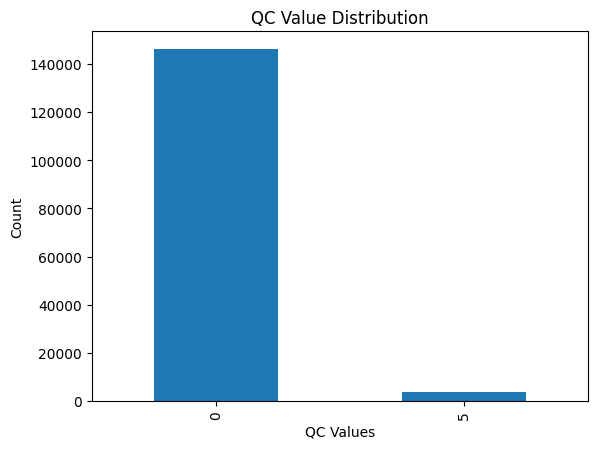

PR_PF_4903220.csv 281406
low quality data precentage: 0.1648863208%
high quality data precentage: 99.8351136792%


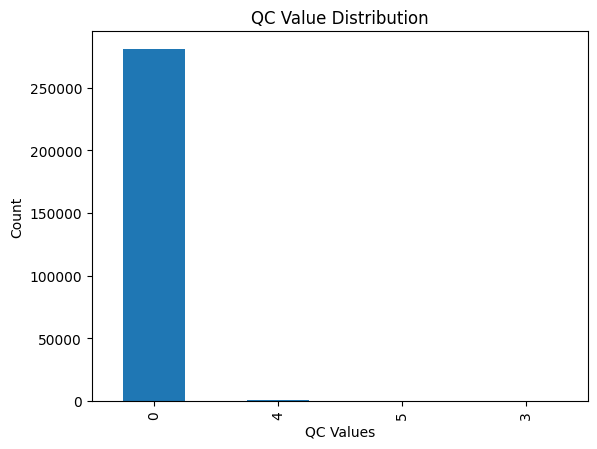

PR_PF_6901272.csv 15102
low quality data precentage: 5.9263673686%
high quality data precentage: 94.0736326314%


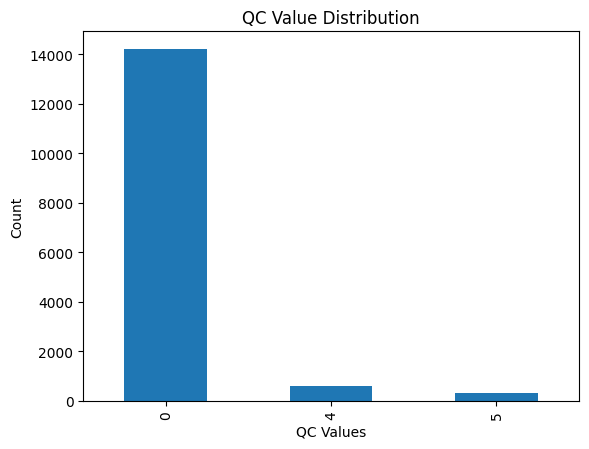

PR_PF_4902911.csv 150258
low quality data precentage: 99.9966723902%
high quality data precentage: 0.0033276098%


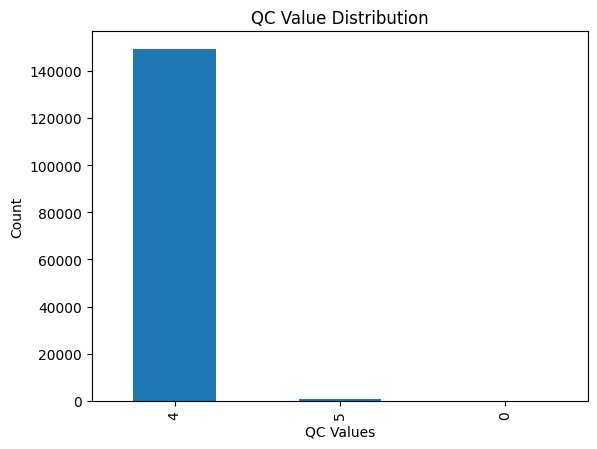

PR_PF_3901857.csv 144465
low quality data precentage: 76.8885197107%
high quality data precentage: 23.1114802893%


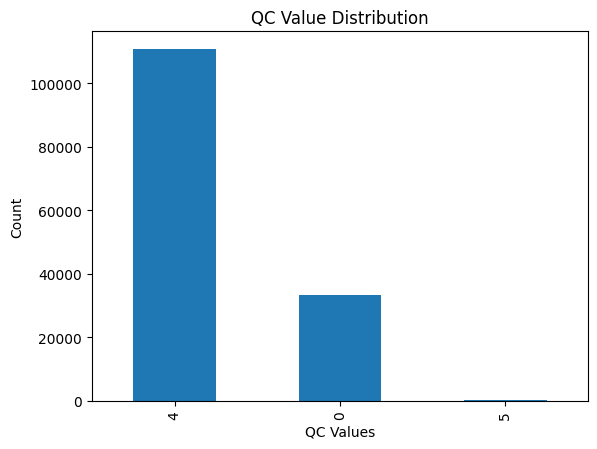

PR_PF_6901195.csv 8515
low quality data precentage: 16.0305343511%
high quality data precentage: 83.9694656489%


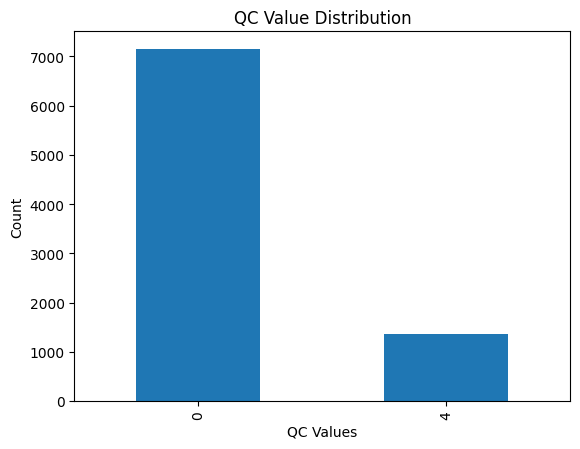

In [12]:
input_path = './dataset1/'
file_paths = [os.path.join(input_path, f) for f in os.listdir(input_path) if f.endswith('.csv')]

for filename in os.listdir(input_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_path, filename)
        df = pd.read_csv(file_path)
        print(filename,len(df))
        flag_qc(df)
        flag_label(df)
        allqc(df)
        oneqc(df)
        df.to_csv(file_path, index=False)
        plot_qc_distribution(df)

In [13]:
#check when TEMP_QC=3 whether PSAL_QC=3
def check_column_values(df):
    mask = df['TEMP_QC'].isin([3, 4])
    filtered_df = df.loc[mask]
    result = filtered_df['PSAL_QC'].isin([3,4]).all()

    return result

In [14]:
input_path = './dataset1/'
file_paths = [os.path.join(input_path, f) for f in os.listdir(input_path) if f.endswith('.csv')]

for filename in os.listdir(input_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_path, filename)
        df = pd.read_csv(file_path)
        print(filename,len(df))
        re=check_column_values(df)
        print(re)

PR_PF_4902338.csv 205381
True
PR_PF_3901684.csv 149847
False
PR_PF_4903220.csv 281406
True
PR_PF_6901272.csv 15102
True
PR_PF_4902911.csv 150258
True
PR_PF_3901857.csv 144465
True
PR_PF_6901195.csv 8515
True


In [22]:
def dis(df):
    fig, ax = plt.subplots(figsize=(16, 4),dpi=600)
    # 设置x轴的日期格式和间隔
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    sns.scatterplot(x='DATE (YYYY-MM-DDTHH:MI:SSZ)', y='QC', hue='QC', data=df, palette='Set1')
    plt.title('QC Distribution')
    plt.show()
    

PR_PF_4902338.csv


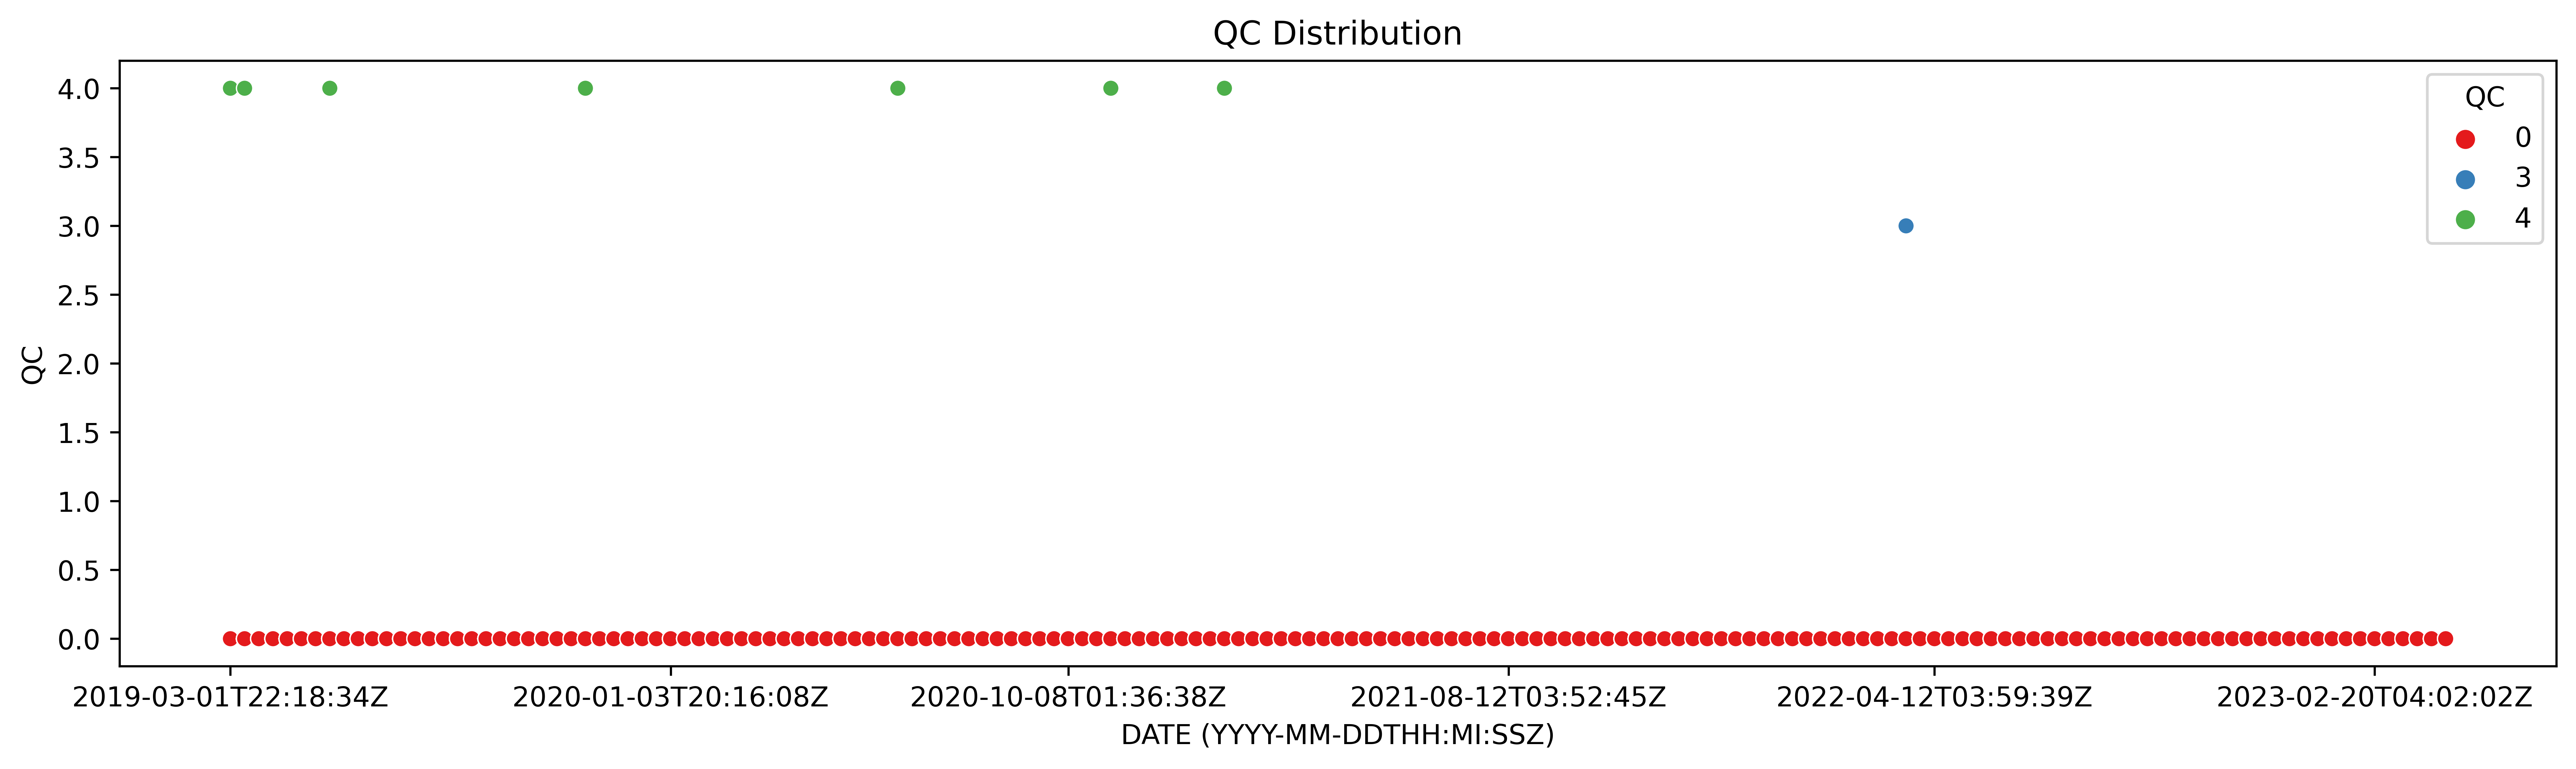

PR_PF_3901684.csv


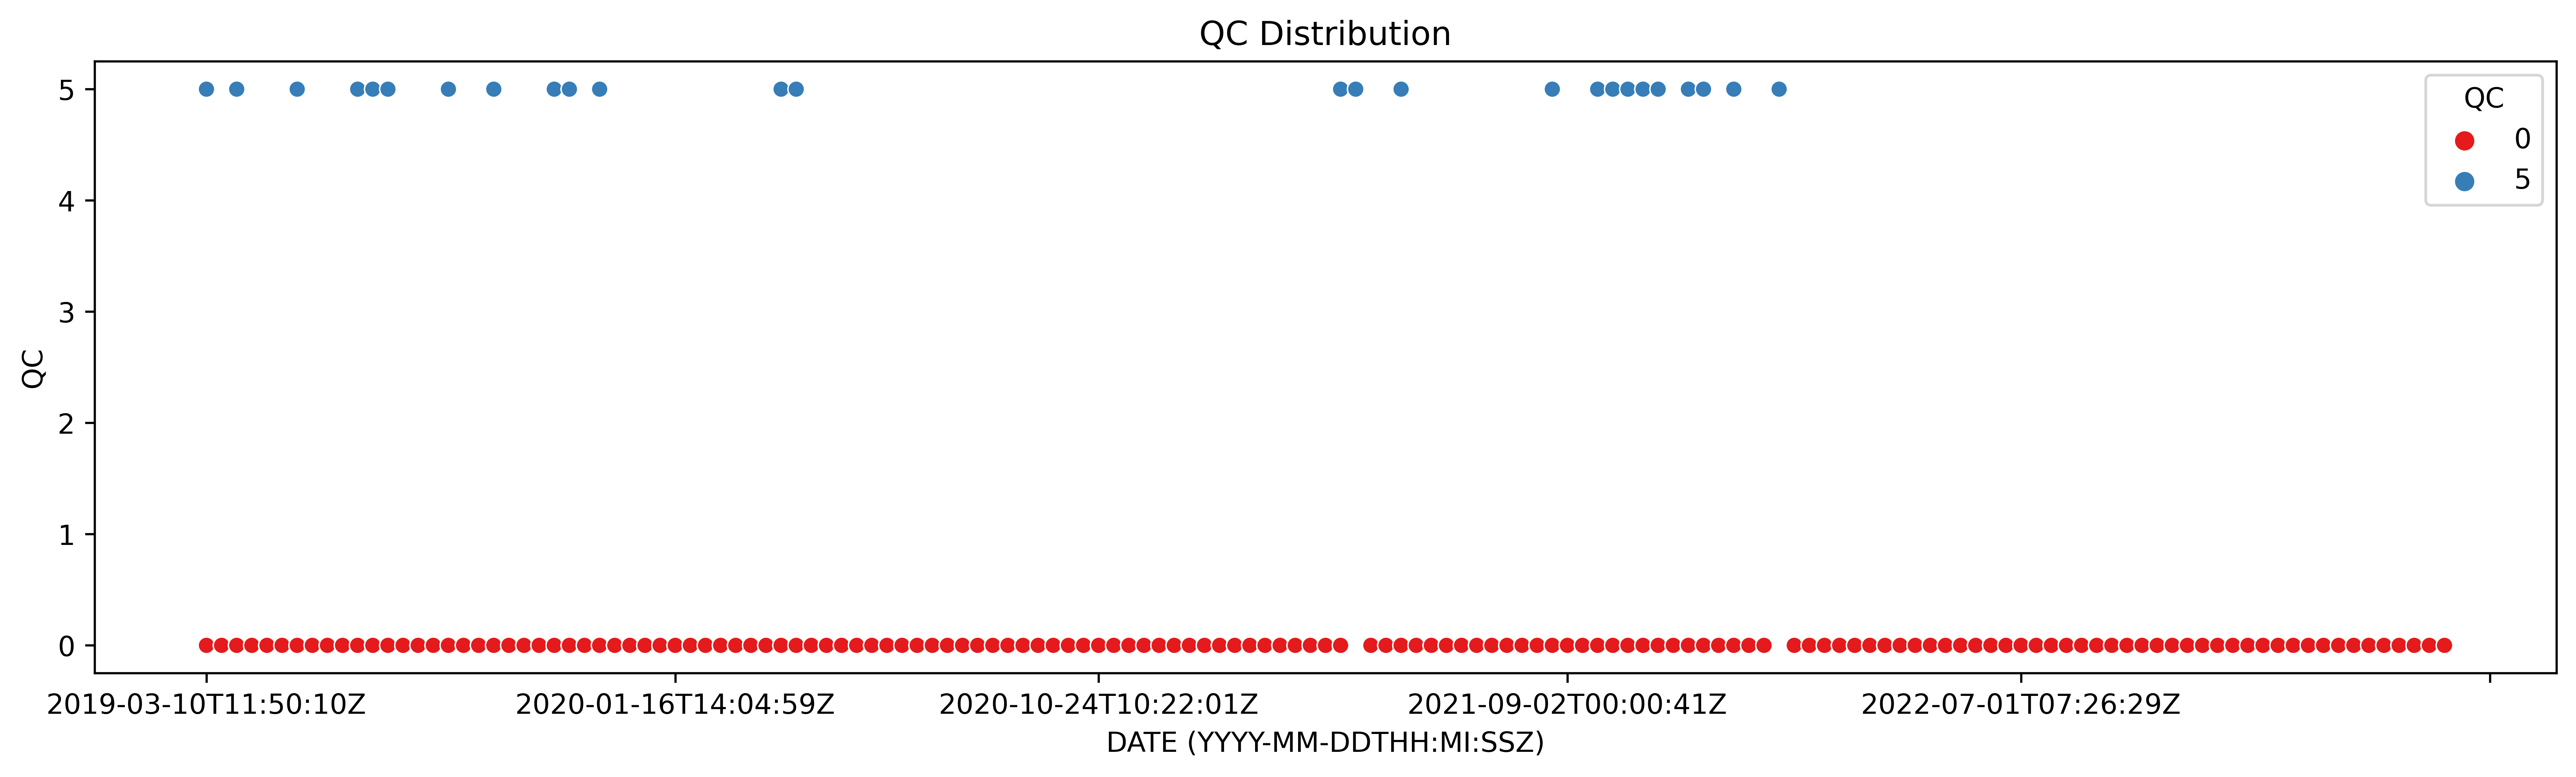

PR_PF_4903220.csv


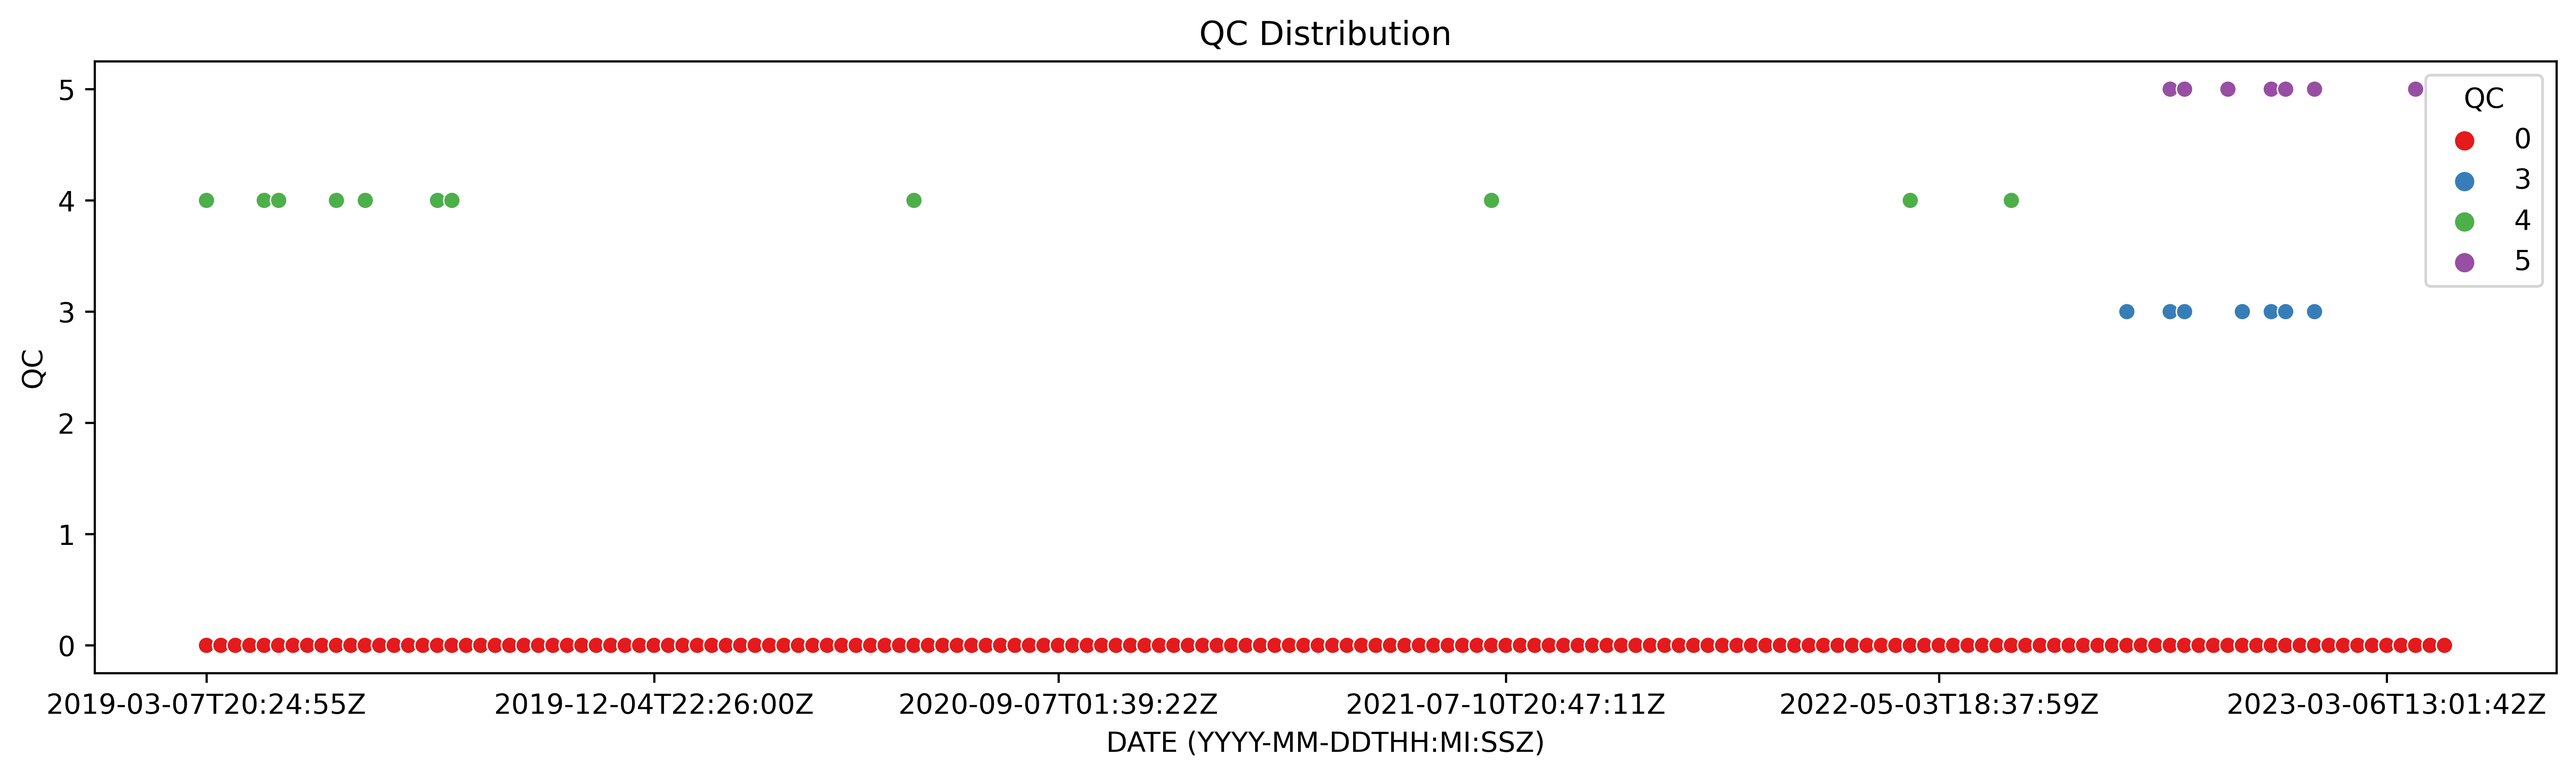

PR_PF_6901272.csv


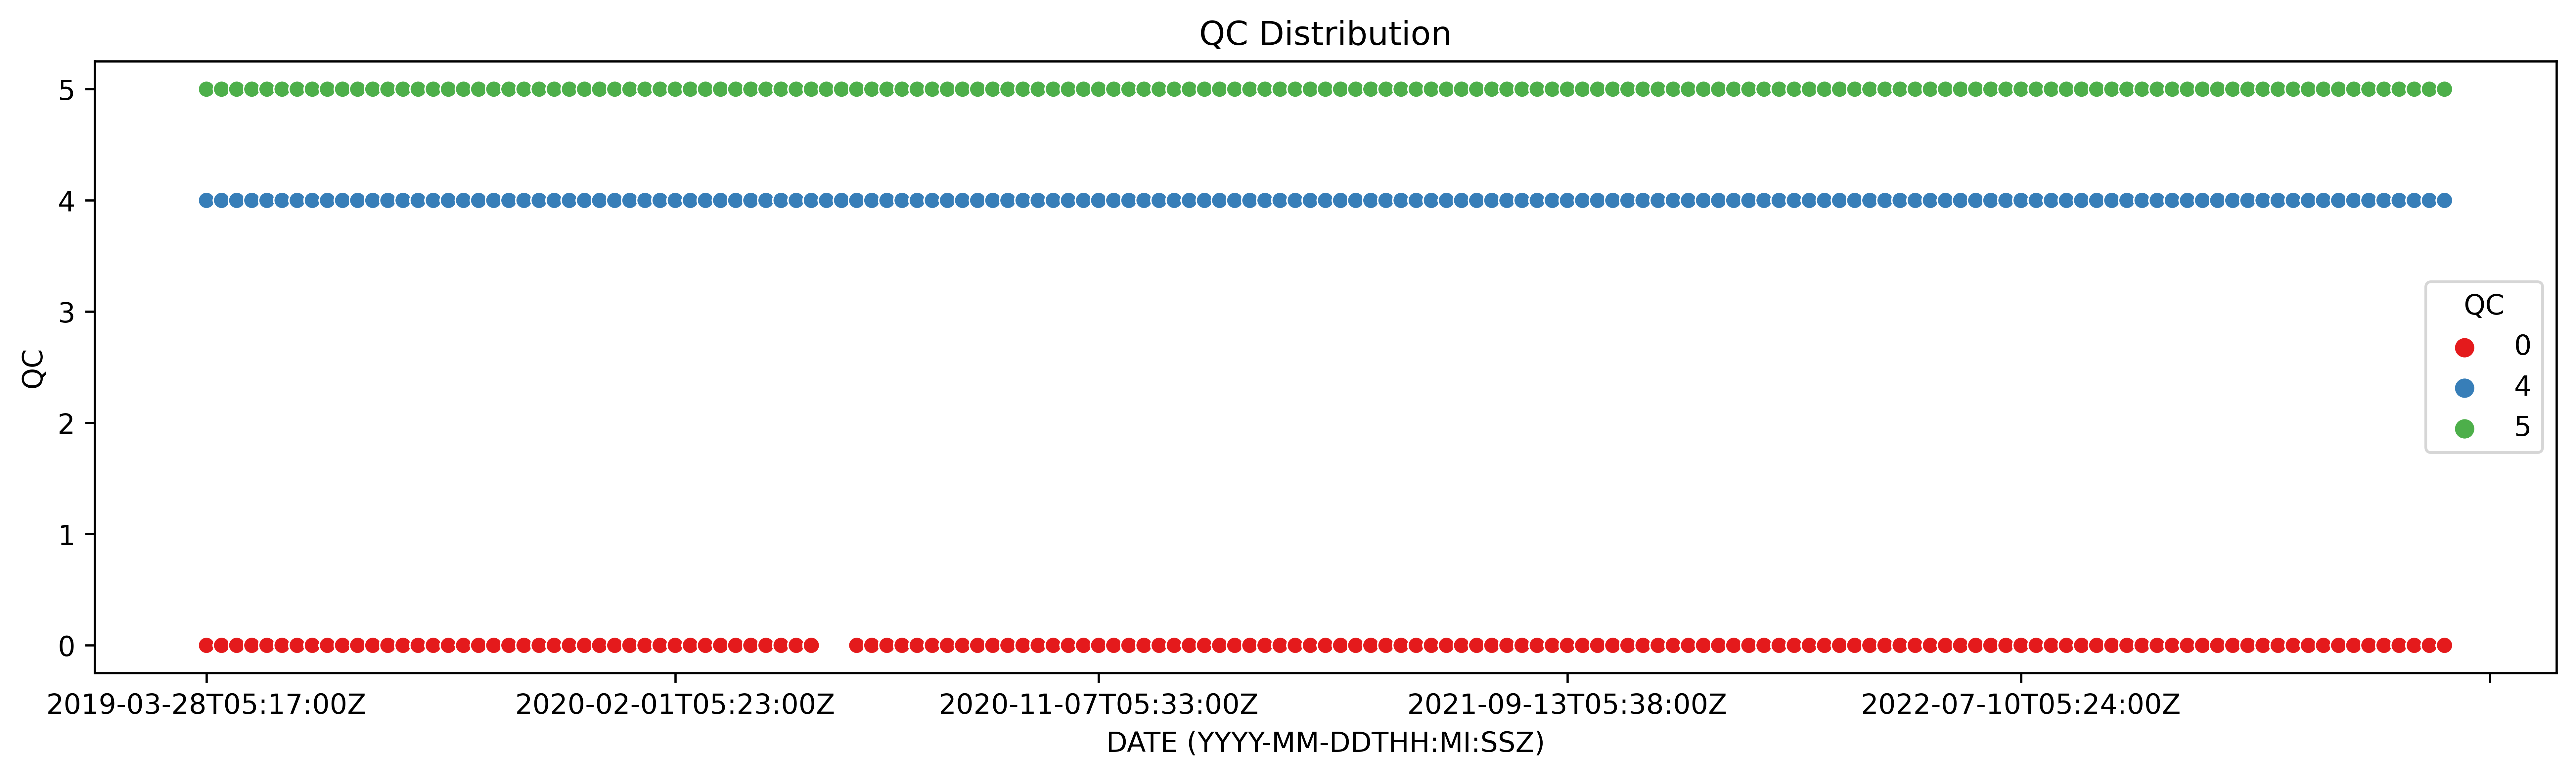

PR_PF_4902911.csv


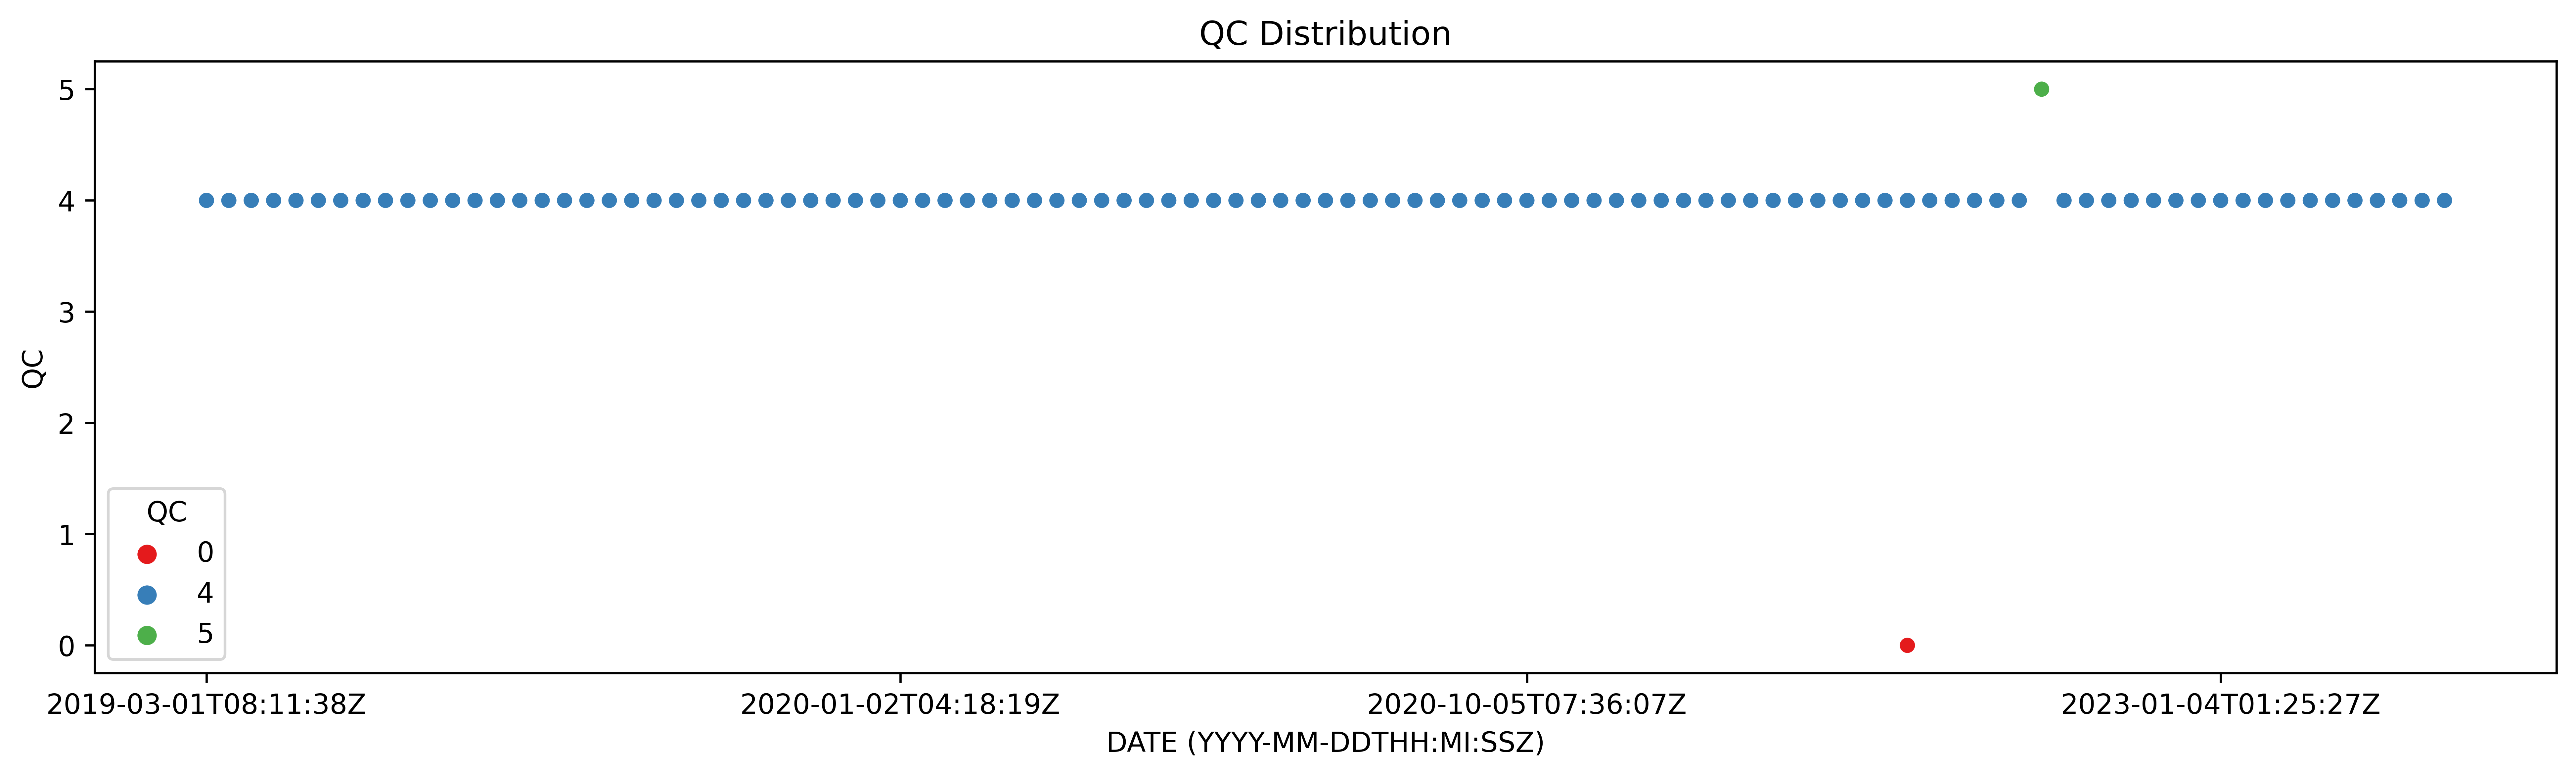

PR_PF_3901857.csv


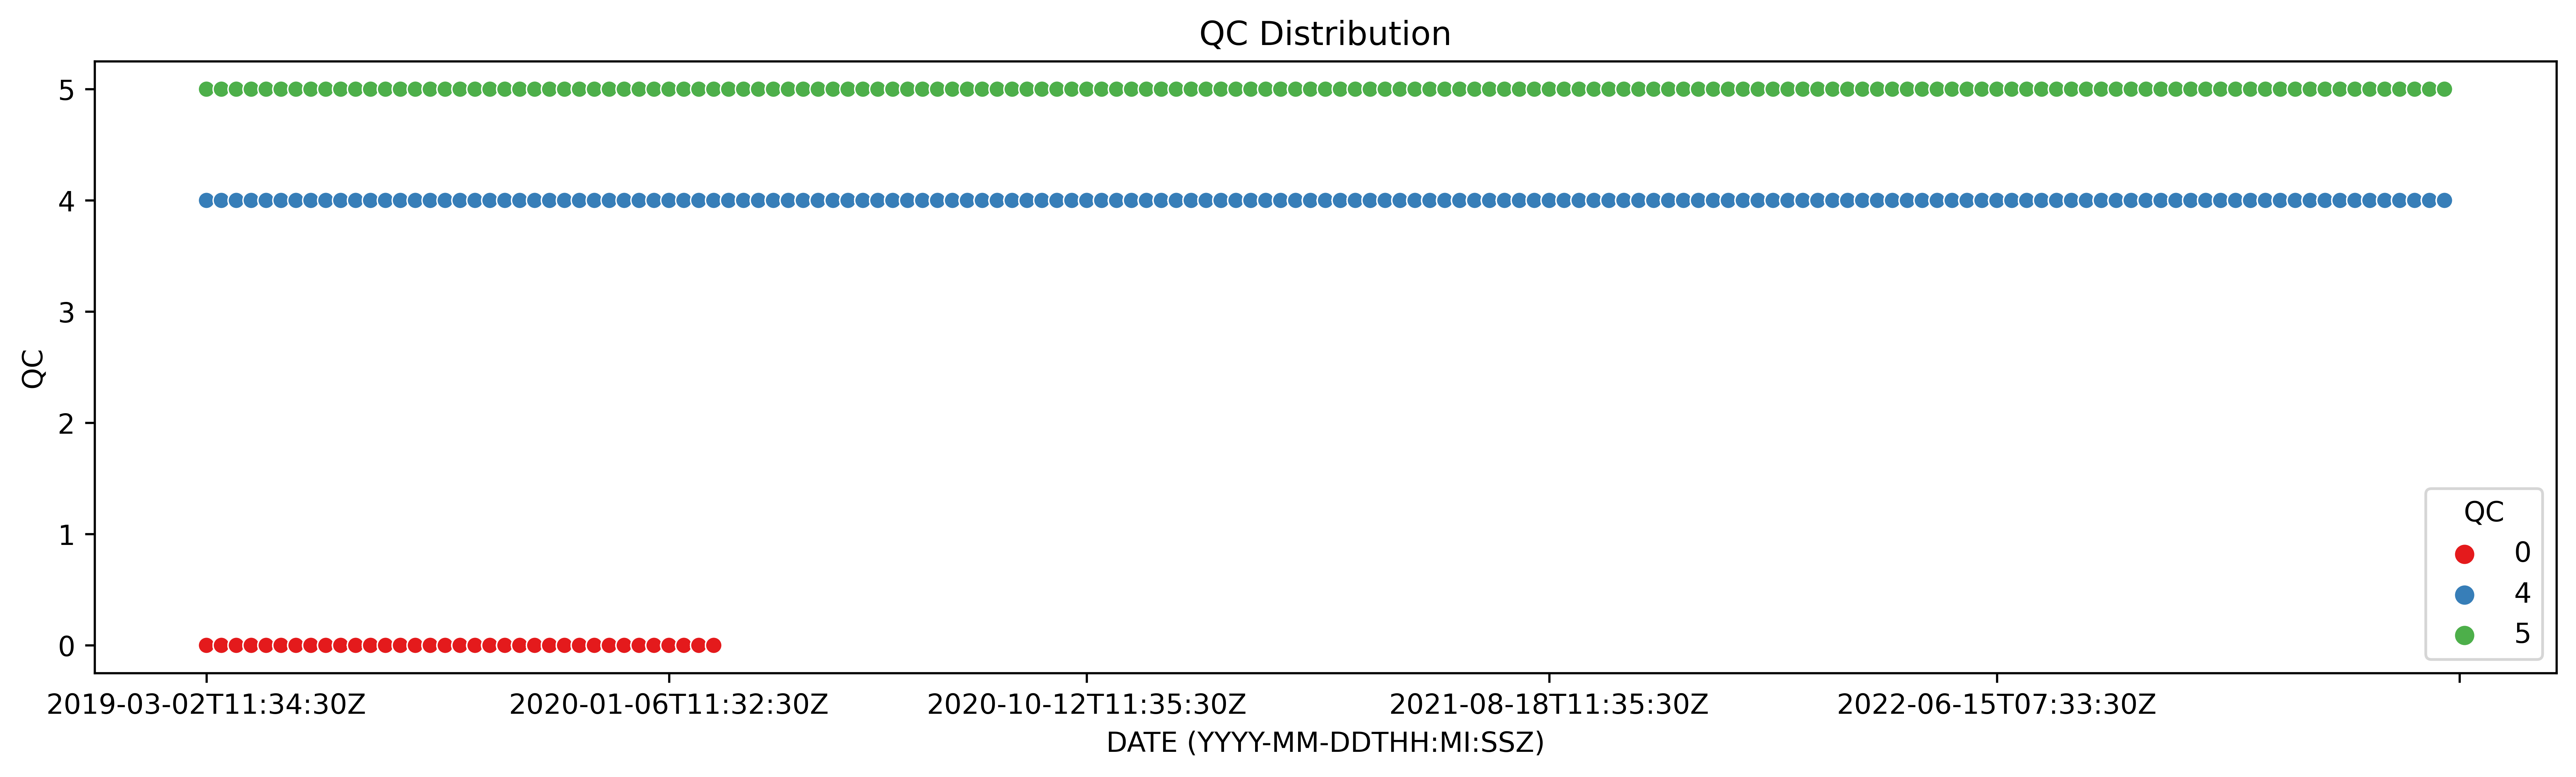

PR_PF_6901195.csv


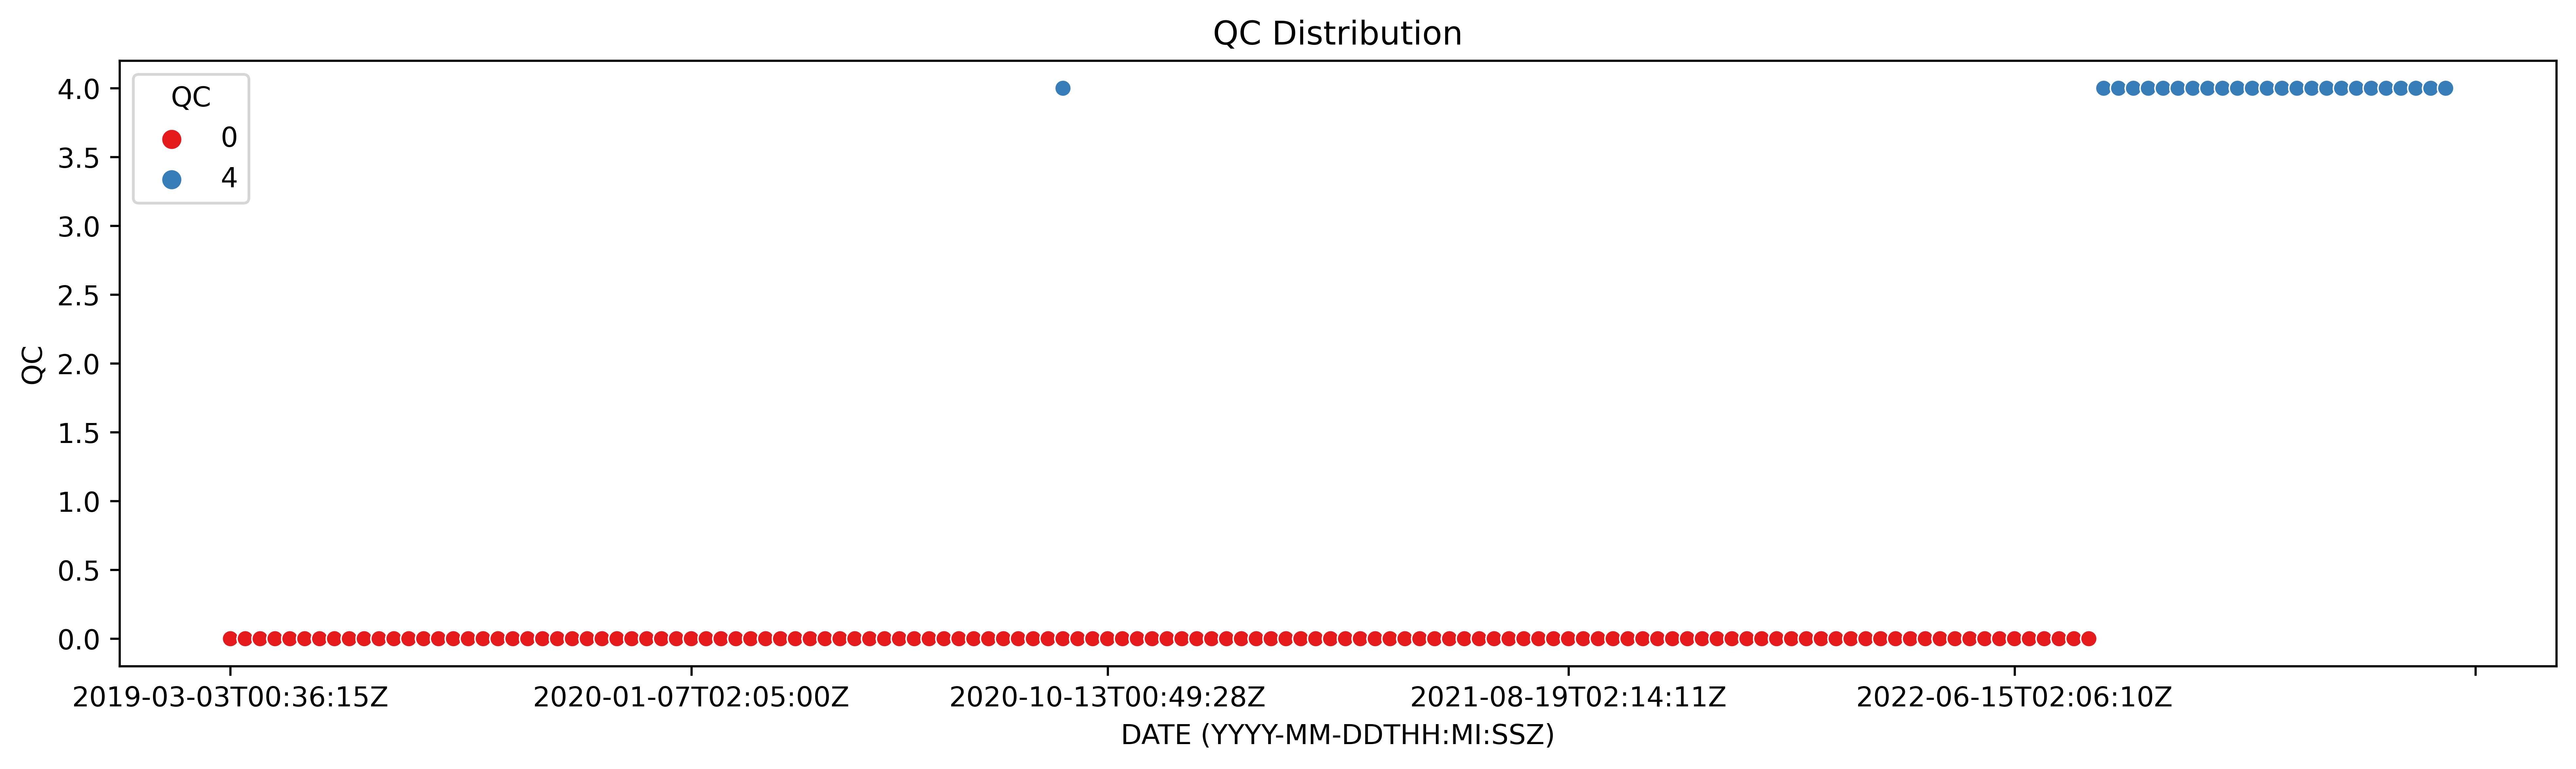

In [23]:
input_path = './dataset1/'
file_paths = [os.path.join(input_path, f) for f in os.listdir(input_path) if f.endswith('.csv')]

for filename in os.listdir(input_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_path, filename)
        df = pd.read_csv(file_path)
        print(filename)
        dis(df)

# normalization, feature engineering 

In [24]:
#drop and Normalization 
def pre(data):
    data = data.drop(['DATE_QC', 'POSITION_QC','PRES_QC', 'PSAL_QC', 'TEMP_QC'], axis=1)
    data = data.rename(columns={'DATE (YYYY-MM-DDTHH:MI:SSZ)': "Date",'LATITUDE (degree_north)':'Latitude','LONGITUDE (degree_east)':'longitude',
                               'PRES (decibar)':'Pressure',  'PSAL (psu)':'Salinity' ,'TEMP (degree_Celsius)':'Temperature'})
    data['Date'] = pd.to_datetime(data['Date'])
    data['Date'] = pd.DatetimeIndex(data['Date']).astype(int) // 10**9
    #normalization
    row,col=data.shape
    df=data.copy()
    for i in range(0,col-2):
        mean = data.iloc[:,i].mean()
        std = np.std(data.iloc[:,i])
        df.iloc[:,i] = data.iloc[:,i].apply(lambda x: (x - mean) / std)
        #print(df)
    return df

In [25]:
input_path = './dataset1/'
file_paths = [os.path.join(input_path, f) for f in os.listdir(input_path) if f.endswith('.csv')]

for filename in os.listdir(input_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_path, filename)
        df = pd.read_csv(file_path)
        print(filename,len(df))
        df=pre(df)
        print(df)
        df.to_csv('./dataset/'+filename, index=False)
        #plot_qc_distribution(df)

PR_PF_4902338.csv 205381
            Date  Latitude  longitude  Pressure  Salinity  Temperature  QC  \
0      -1.700371  2.802593  -1.482073 -1.024526  0.506199     0.480367   0   
1      -1.700371  2.802593  -1.482073 -1.022844  0.506199     0.480367   0   
2      -1.700371  2.802593  -1.482073 -1.021410  0.506199     0.480367   0   
3      -1.700371  2.802593  -1.482073 -1.019852  0.506199     0.480490   0   
4      -1.700371  2.802593  -1.482073 -1.018294  0.506199     0.480490   0   
...          ...       ...        ...       ...       ...          ...  ..   
205376  1.856255 -0.966334   0.955236 -0.950794  1.489026     1.024261   0   
205377  1.856255 -0.966334   0.955236 -0.950607  1.490123     1.024261   0   
205378  1.856255 -0.966334   0.955236 -0.950420  1.489026     1.024384   0   
205379  1.856255 -0.966334   0.955236 -0.950233  1.490123     1.024261   0   
205380  1.856255 -0.966334   0.955236 -0.950046  1.489026     1.024261   0   

        label  
0           0  
1     